<p style="margin-bottom:4px"><b>Monte Carlo Methods</b></p>
<h1 style="margin:0px">Lab: Traffic Modeling</h1>
<br/>
<p style="margin:0px">Anand Kamble</p>
<a href="mailto:amk23j@fsu.edu" style="margin:0px">amk23j@fsu.edu</a>
<p>5th October 2023</p>
<hr style="border:2px solid gray"/>

In [40]:
"""
Dependencies:
- NumPy: a powerful numerical computing library.
- Matplotlib: a 2D plotting library for creating visualizations in Python.
- IPython.display: provides tools for displaying rich content in the IPython environment, including Markdown and LaTeX.
"""
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display, Latex

In [41]:
def updatePosVel(carLoc, carVel, M, vmax, p):
    """
    Update car positions and velocities over one time step.

    Parameters:
    - carLoc (numpy.ndarray): Current positions of cars.
    - carVel (numpy.ndarray): Current velocities of cars.
    - M (int): Length of the road.
    - vmax (int): Maximum velocity allowed for the cars.
    - p (float): Probability of randomization, affecting car acceleration.

    Returns:
    - Loc (numpy.ndarray): Updated car positions after one time step.
    - u (numpy.ndarray): Acceleration values applied to each car.

    Algorithm:
    1. Acceleration: Increment velocity, up to the maximum allowed.
    2. Deceleration: Adjust velocity based on the distance to the next car.
    3. Randomization: Randomly decrease velocity based on a given probability.
    4. Update: Compute new car positions using the updated velocities.

    Note:
    - The function assumes periodic boundary conditions for the road.
    - The returned 'Loc' array contains the updated positions of cars after one time step.
    - The returned 'u' array contains the acceleration values applied to each car.
    """
    numCars = len(carLoc)
    u = np.minimum(carVel + 1, vmax)
    d = np.append(np.diff(carLoc), carLoc[0] - carLoc[-1])
    d = np.remainder(d, M) 
    u = np.minimum(u, d-1)
    idx = np.random.rand(numCars) <= p # <---- Updated Line/
    # idx = np.random.rand(numCars) - p < 0
    u[idx] = np.maximum(0, u[idx]-1)
    Loc = np.remainder(carLoc + u, M).astype(int)
    return Loc, u


<hr style="border:1px solid gray"/>  
<p style="page-break-after:always;"></p><br/><br/>

Run a burn-in simulation to initialize car positions and velocities.

In [42]:
def BurnInRun(N=200, M=1000, vmax=5, prand=0.3333,ncycles=100):
    """
    Run a burn-in simulation to initialize car positions and velocities.

    Parameters:
    - N (int): Number of cars.
    - M (int): Length of the road (modulus for periodic boundary conditions).
    - vmax (int): Maximum velocity allowed for the cars.
    - prand (float): Probability of randomization, affecting car acceleration.
    - ncycles (int): Number of simulation cycles to run for the burn-in.

    Returns:
    - carLoc (numpy.ndarray): Final positions of cars after the burn-in.
    - carVel (numpy.ndarray): Final velocities of cars after the burn-in.

    Algorithm:
    1. Initialize random positions and velocities for the cars.
    2. Run the updatePosVel function for a specified number of cycles to simulate the burn-in.
    3. Return the final positions and velocities after the burn-in.

    Example:
    >>> N = 200
    >>> M = 1000
    >>> vmax = 5
    >>> p = 0.3333
    >>> ncycles = 100
    >>> carLoc, carVel = BurnInRun(N, M, vmax, p, ncycles)

    Note:
    - The function initializes car positions randomly and velocities within the specified range.
    - The burn-in simulation helps set up a realistic initial state for subsequent simulations.
    - The returned 'carLoc' array contains the final positions of cars after the burn-in.
    - The returned 'carVel' array contains the final velocities of cars after the burn-in.
    """
    # carLoc = np.random.choice(M, N, replace=False)
    carLoc = np.sort(np.random.choice(M,N,replace=False))
    carVel = np.random.randint(0, vmax + 1, N)
    for t in range(1, ncycles):
        carLoc, carVel = updatePosVel(carLoc, carVel, M, vmax, prand)
    return carLoc, carVel

<hr style="border:1px solid gray"/>  
<p style="page-break-after:always;"></p><br/><br/>

Run the main simulation to study traffic flow over multiple cycles.

In [43]:
def MainRun(ncycles, numCars, M, vmax, p):
    """
    Run the main simulation to study traffic flow over multiple cycles.

    Parameters:
    - ncycles (int): Number of simulation cycles.
    - numCars (int): Number of cars in the simulation.
    - M (int): Length of the road.
    - vmax (int): Maximum velocity allowed for the cars.
    - p (float): Probability of randomization, affecting car acceleration.

    Returns:
    - avgVelocity (float): Average velocity of cars over the simulation.
    - flowTrace (numpy.ndarray): Traffic flow trace over the simulation.

    Algorithm:
    1. Perform a burn-in run to initialize car positions and velocities.
    2. Run the updatePosVel function for a specified number of cycles to simulate the main run.
    3. Record the traffic flow at each cycle.
    4. Calculate and return the average velocity and traffic flow trace.

    Example:
    >>> ncycles = 200
    >>> numCars = 100
    >>> M = 1000
    >>> vmax = 5
    >>> p = 0.3333
    >>> avgVelocity, flowTrace = MainRun(ncycles, numCars, M, vmax, p)

    Note:
    - The function initializes car positions and velocities using a burn-in run.
    - The main simulation records the traffic flow at each cycle.
    - The returned 'avgVelocity' is the average velocity of cars over the entire simulation.
    - The returned 'flowTrace' is a matrix representing the traffic flow at each cycle.
    """
    carLoc, carVel = BurnInRun(numCars, M, vmax, p, ncycles)
    vavg = np.zeros(ncycles)
    vavg[0] = np.mean(carVel)
    flowTrace = np.zeros((ncycles,M))
    for t in range(1, ncycles):
        carLoc, carVel = updatePosVel(carLoc, carVel, M, vmax, p)
        vavg[t] = np.mean(carVel)
        flowTrace[t][carLoc] = 1
    return np.mean(vavg) , flowTrace

<hr style="border:1px solid gray"/>  
<p style="page-break-after:always;"></p><br/><br/>

### Simulation Configuration and Execution

In [44]:
# Number of steps to simulate
steps = 1000
# Length of road
M = 1000
# Number of Cars
N = 50
# Max velocity of car
vmax = 5
# Probability of randomization
p = 1/3

# Run the main simulation
avg, matOcc = MainRun(steps, N, M, vmax, p)

display(Markdown('<br/><hr style="border:2px solid gray"/>'))
display(Markdown("## Result"))
display(Markdown("### Average Velocity"))
display(Latex(f"The average velocity of cars over the simulation is: $ {avg}$"))
display(Markdown('<br/><hr style="border:1px solid gray"/>'))

<br/><hr style="border:2px solid gray"/>

## Result

### Average Velocity

<IPython.core.display.Latex object>

<br/><hr style="border:1px solid gray"/>

<br/>
<p style="page-break-after:always;"></p><br/><br/>


### Traffic Flow Trace

Visualizing the traffic flow trace over the simulation:

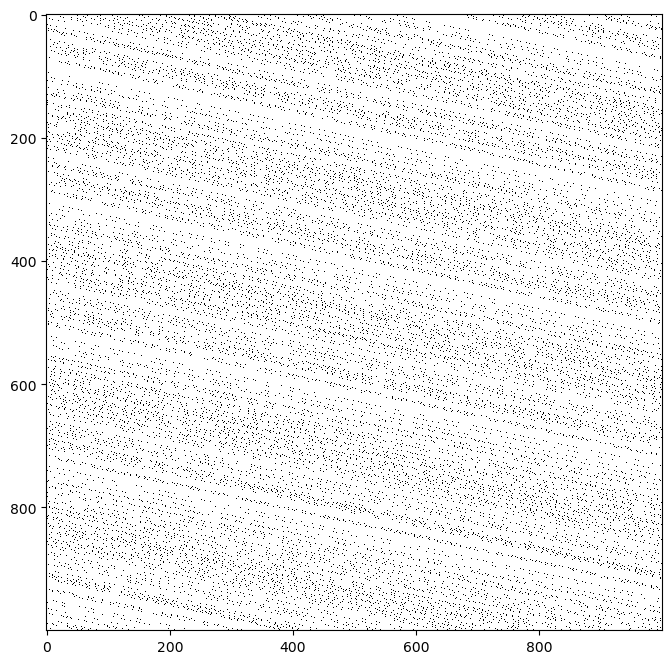

In [45]:
display(Markdown("### Traffic Flow Trace"))
display(Markdown("Visualizing the traffic flow trace over the simulation:"))
plt.figure(figsize=(10, 8))
plt.imshow(matOcc, cmap="Greys", interpolation='nearest');

<br/>
<p style="page-break-after:always;"></p><br/><br/>
<br/><hr style="border:2px solid gray"/>

**Average Speed of Cars Over the Entire Run**

Calculating the average speed $ \bar{v} $ of the cars over the entire run with independent replicas.


In [46]:
def averageSpeeds(replicas):
    # Number of steps to simulate
    steps = 1000
    # Length of road
    M = 1000
    # Max velocity of car
    vmax = 5
    # Probability of randomization
    p = 1/3

    N = 50
    Vaverages = list()
        
    for i in range(replicas):
        vavg, flows = MainRun(steps, N, M, vmax, p)
        Vaverages.append(vavg)

    overall_avg_speed = np.mean(Vaverages)

    vBar = "{\overline{v}}"
    display(Latex(f"The average speed over the entire run with {replicas} independent replicas is, $$ {vBar} = {overall_avg_speed}$$"))
    display(Latex(f"And average flow is, $$ f(N) = N{vBar} = {overall_avg_speed * N} $$ "))
    print("And average speeds for each replica are as follows\n", Vaverages)
        
averageSpeeds(3)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

And average speeds for each replica are as follows
 [4.64706, 4.64876, 4.640040000000001]


<br/>
<p style="page-break-after:always;"></p>
<br/><hr style="border:2px solid gray"/>

We need to repeat the above simulation for different number of cars between $N = 50$ and $N = 300$. We will be using the following function for that purpose. Where the $M$, $V_{max}$, and $p$ will be constant, and the only variable will be $N$.

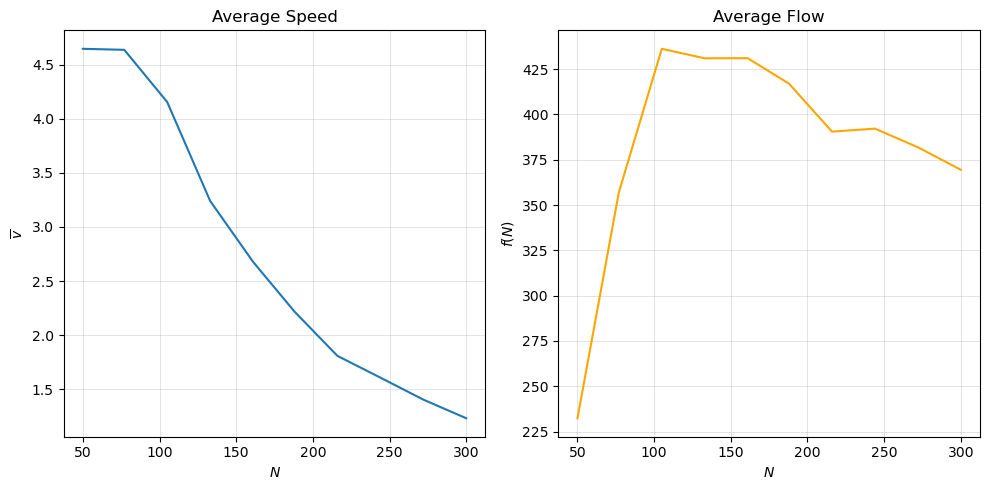

In [54]:
# Number of samples to be picked between 50 and 300.
numberOfSamples = 10
# Number of steps to simulate
steps = 1000
# Length of road
M = 1000
# Max velocity of car
vmax = 5
# randomization factor
p = 1/3

N = np.linspace(50,300,numberOfSamples,dtype=np.int16)

results = [MainRun(steps, n, M, vmax, p) for n in N]  
vavg, flows = [list(r) for r in zip(*results)]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Adjust the figure size as needed
axs[0].plot(N,vavg, label='${\overline{v}}$')
axs[0].set_title('Average Speed')
axs[0].set_xlabel('$N$')
axs[0].set_ylabel('$\overline{v}$')
axs[0].grid(linewidth=0.5,alpha=0.5)

flowrates = vavg*N
axs[1].plot(N,flowrates, label='$f(N)$', color='orange')
axs[1].set_title('Average Flow')
axs[1].set_xlabel('$N$')
axs[1].set_ylabel('$f(N)$')
axs[1].grid(linewidth=0.5,alpha=0.5)


plt.tight_layout()
plt.show()

From the above results, it can be said that, as we increase the number of cars from 50 to 300, i.e. $N = 50$ to $N = 300$, the average speed of cars starts decreasing. But the flow rate increases with the number of cars upto a certain point and the starts decreasing which indicates traffic congestion.

<br/><hr style="border:2px solid gray"/>

### Optimal value of $N$ 

In [48]:
N_Optimal_index = np.argmax(flowrates)
N_Optimal = N[N_Optimal_index]
Max_Flow = flowrates[N_Optimal_index]

display(Markdown("The optimal value of number of cars is,"))
display(Latex("$$N_{Optimal} =" + f"   {N_Optimal} $$"))

The optimal value of number of cars is,

<IPython.core.display.Latex object>

#### Flow trace for $N_{Optimal}$

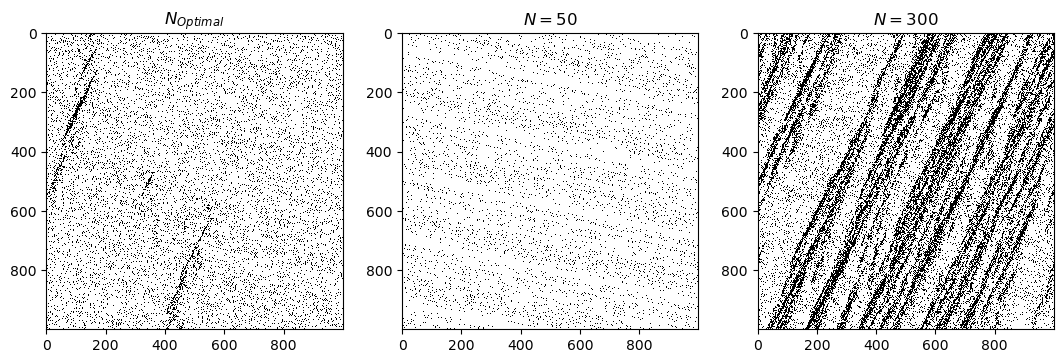

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(13, 5))

axs[0].imshow(flows[N_Optimal_index], cmap="Greys", interpolation='nearest');
axs[0].set_title('$N_{Optimal}$');
axs[1].imshow(flows[0], cmap="Greys", interpolation='nearest');
axs[1].set_title('$ N = 50 $');
axs[2].imshow(flows[-1], cmap="Greys", interpolation='nearest');
axs[2].set_title('$ N = 300 $');

From the above plots, it is evident that the traffic attains its maximum speed when $ N = 50 $, and there is plenty of space between each vehicle. At the optimal $ N $, the average speed experiences a slight decline, yet due to an increased density, the flow rate reaches its maximum value. Conversely, for $ N = 300 $, the average speed of vehicles is notably diminished, and waves of deceleration traverse in a opposite direction to the traffic flow.

<br/><hr style="border:2px solid gray"/>